In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedMouseStudy_df = pd.merge(mouse_metadata_df,study_results_df, on=["Mouse ID"])

# Display the data table for preview
combinedMouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.Unqiue
numberMiceUnique = combinedMouseStudy_df["Mouse ID"].nunique()
#Check the number of mice occurences over the dataset
numberMice = combinedMouseStudy_df["Mouse ID"].count()

print(f"Unique Mice: {numberMiceUnique}\nNumber of Mice Occurences: {numberMice}")

Unique Mice: 249
Number of Mice Occurences: 1893


In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicateRows = combinedMouseStudy_df[combinedMouseStudy_df.duplicated(["Mouse ID", "Timepoint"])]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop any duplicate rows
cleanedMouseStudy_df = combinedMouseStudy_df[combinedMouseStudy_df["Mouse ID"] != "g989"]
cleanedMouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Recheck the number of mice

# Check the number of mice.Unqiue
numberMiceUnique = cleanedMouseStudy_df["Mouse ID"].nunique()

#Check the number of mice occurences over the dataset
numberMice = cleanedMouseStudy_df["Mouse ID"].count()

print(f"Unique Mice: {numberMiceUnique}\nNumber of Mice Occurences: {numberMice}")

Unique Mice: 248
Number of Mice Occurences: 1880


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summaryStats_df = cleanedMouseStudy_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summaryStats_df.columns = ["TumorVolume(mm3)_Mean","TumorVolume(mm3)_Median","TumorVolume(mm3)_Variance","TumorVolume(mm3)_STD","TumorVolume(mm3)_SEM"]
summaryStats_df = summaryStats_df.reset_index()
summaryStats_df

,Drug Regimen,TumorVolume(mm3)_Mean,TumorVolume(mm3)_Median,TumorVolume(mm3)_Variance,TumorVolume(mm3)_STD,TumorVolume(mm3)_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [7]:
#Groupby object to use for Bar Graph
regimenDataPoints = cleanedMouseStudy_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimenDataPoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Data Points')

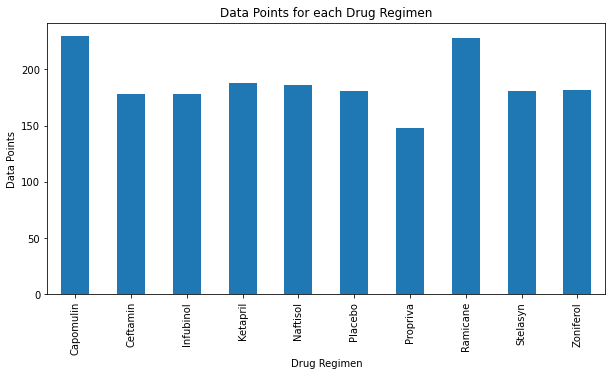

In [8]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
barRegimen = regimenDataPoints.plot.bar(figsize = (10,5), title = "Data Points for each Drug Regimen")

#Label the Chart
barRegimen.set_xlabel("Drug Regimen")
barRegimen.set_ylabel("Data Points")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

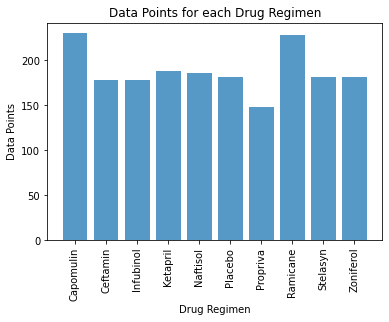

In [9]:
# Generate identical bar plot using pyplot instead of pandas.
plt.bar(summaryStats_df["Drug Regimen"],regimenDataPoints, alpha = 0.75, align = "center")

#Format the Bar Graph
plt.title("Data Points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation = "vertical")


In [10]:
#Create Groupby object showing sex for each unique Mice
miceSex =  cleanedMouseStudy_df.groupby(["Sex"]).nunique()["Mouse ID"]

#Create a DataFrame using the previous GroupBy object for graphing
miceSex_df = pd.DataFrame(miceSex)
miceSex_df.columns = ["Total Count"]
miceSex_df["Percentage of Sex"] = ((miceSex_df["Total Count"] / miceSex_df["Total Count"].sum()) * 100)
miceSex_df

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


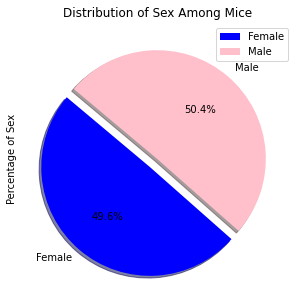

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Set the paramaters for the plot function
title = "Distribution of Sex Among Mice"
y_axis = "Percentage of Sex"
colors = ["blue", "pink"]
explode = (0.1, 0)

#Create the Pandas Pie graph
miceSex_df.plot.pie(y = y_axis, title = title, figsize=(5,5), colors = colors, startangle = 140, explode = explode, shadow = True, autopct = "%1.1f%%")

(-1.1877230750926049,
 1.111197451260921,
 -1.1963304488776791,
 1.1123702248046798)

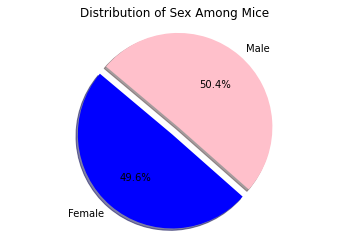

In [12]:
# Generate identical pie plot using pyplot
#Create Labels for the sections of the pie graph
labels = ["Female", "Male"]

#Create The Pie Graph
plt.pie(miceSex_df["Total Count"],labels = labels, explode = explode, colors = colors,startangle = 140, shadow = True, autopct = "%1.1f%%")

#Set Labels for the pie graph
plt.title("Distribution of Sex Among Mice")

#Set equal Axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Create a new DataFrame that will only have the following Regimens
# Capomulin, Ramicane, Infubinol, and Ceftamin
sampleFourRegimens_df = cleanedMouseStudy_df[cleanedMouseStudy_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#Set the new DataFrame to only show the columns we want to see for this question
#Drug Regimen, Mouse Id, Timepoint, Tumor Volume
sampleFourRegimens_df = sampleFourRegimens_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Sort the new dataframe in ascending order by timepoint, so that we can pull the last timepoint for each Mouse ID
sampleFourRegimens_df = sampleFourRegimens_df.sort_values(["Timepoint"], ascending = True)

#Output Sample
sampleFourRegimens_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
lastDataPoint = sampleFourRegimens_df.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]

#Convert lastDataPoint series to DataFrame for easier manipulation
lastDataPoint_df =  lastDataPoint.to_frame()

#Change the Tumor Volume to say max Tumor Volume
lastDataPoint_df = lastDataPoint_df.rename(columns = {"Tumor Volume (mm3)" : "Max Tumor Volume (mm3)"})
lastDataPoint_df

Max Tumor Volume (mm3)
Drug Regimen Mouse ID                        
Capomulin    b128                   38.982878
             b742                   38.939633
             f966                   30.485985
             g288                   37.074024
             g316                   40.159220
...                                       ...
Ramicane     s508                   30.276232
             u196                   40.667713
             w678                   43.166373
             y449                   44.183451
             z578                   30.638696

[100 rows x 1 columns]

In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combinedMouseStudy_df = pd.merge(combinedMouseStudy_df,lastDataPoint_df, on=["Mouse ID"])
combinedMouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


{'whiskers': [<matplotlib.lines.Line2D at 0x29ba8e2cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x29ba8e3a310>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ba8e2c8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x29ba8e3a9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29ba8e3acd0>,
 'means': []}

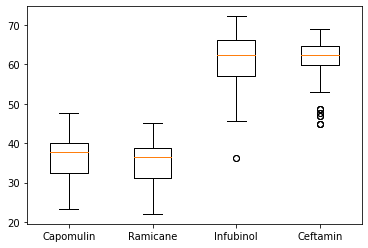

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
fourRegimenList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in fourRegimenList:
    # Locate the rows which contain mice on each drug and get the  max tumor volumes
    tumorList.append(combinedMouseStudy_df["Max Tumor Volume (mm3)"].loc[combinedMouseStudy_df["Drug Regimen"] == regimen])

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
plt.boxplot(tumorList, labels=fourRegimenList)


In [17]:
#"Capomulin"
capomulinQuartiles = combinedMouseStudy_df["Max Tumor Volume (mm3)"].loc[combinedMouseStudy_df["Drug Regimen"] == "Capomulin"].quantile([.25, .5, .75])
capomulinLowerQ = capomulinQuartiles[.25]
capomulinUpperQ = capomulinQuartiles[.5]
capomulinIqr = capomulinUpperQ - capomulinLowerQ

#Potential Outliers
capomulinLowerBound = capomulinLowerQ - (1.5 * capomulinIqr)
capomulinUpperBound = capomulinUpperQ + (1.5 * capomulinIqr)

print(f"Potential outliers for Capomulin could be values below {capomulinLowerBound} and above {capomulinUpperBound}")

Potential outliers for Capomulin could be values below 24.3656344725 and above 45.730227452499996


In [18]:
#"Ramicane"
ramicaneQuartiles = combinedMouseStudy_df["Max Tumor Volume (mm3)"].loc[combinedMouseStudy_df["Drug Regimen"] == "Ramicane"].quantile([.25, .5, .75])
ramicaneLowerQ = ramicaneQuartiles[.25]
ramicaneUpperQ = ramicaneQuartiles[.5]
ramicaneIqr = ramicaneUpperQ - ramicaneLowerQ

#Potential Outliers
ramicaneLowerBound = ramicaneLowerQ - (1.5 * ramicaneIqr)
ramicaneUpperBound = ramicaneUpperQ + (1.5 * ramicaneIqr)

print(f"Potential outliers for Capomulin could be values below {ramicaneLowerBound} and above {ramicaneUpperBound}")

Potential outliers for Capomulin could be values below 23.176572040000003 and above 44.2932734


In [19]:
#"Infubinol"
infubinolQuartiles = combinedMouseStudy_df["Max Tumor Volume (mm3)"].loc[combinedMouseStudy_df["Drug Regimen"] == "Infubinol"].quantile([.25, .5, .75])
infubinolLowerQ = infubinolQuartiles[.25]
infubinolUpperQ = infubinolQuartiles[.5]
infubinolIqr = infubinolUpperQ - infubinolLowerQ

#Potential Outliers
infubinolLowerBound = infubinolLowerQ - (1.5 * infubinolIqr)
infubinolUpperBound = infubinolUpperQ + (1.5 * infubinolIqr)

print(f"Potential outliers for Capomulin could be values below {infubinolLowerBound} and above {infubinolUpperBound}")

Potential outliers for Capomulin could be values below 49.1651425075 and above 70.1430608075


In [20]:
#"Ceftamin"
ceftaminQuartiles = combinedMouseStudy_df["Max Tumor Volume (mm3)"].loc[combinedMouseStudy_df["Drug Regimen"] == "Ceftamin"].quantile([.25, .5, .75])
ceftaminLowerQ = ceftaminQuartiles[.25]
ceftaminUpperQ = ceftaminQuartiles[.5]
ceftaminIqr = ceftaminUpperQ - ceftaminLowerQ

#Potential Outliers
ceftaminLowerBound = ceftaminLowerQ - (1.5 * ceftaminIqr)
ceftaminUpperBound = ceftaminUpperQ + (1.5 * ceftaminIqr)

print(f"Potential outliers for Capomulin could be values below {ceftaminLowerBound} and above {ceftaminUpperBound}")

Potential outliers for Capomulin could be values below 55.71846693749999 and above 66.4476234775


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

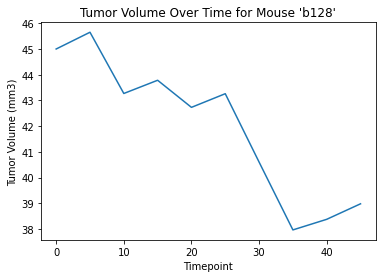

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

#Create a dataFrame that has all of the data for mouse b128
tumorVsTime = combinedMouseStudy_df.loc[combinedMouseStudy_df["Mouse ID"] == "b128"]

#Edit the DataFrame to only have the relevant data needed for plotting
tumorVsTime_df = tumorVsTime[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Set plot variables
x_axis = tumorVsTime_df["Timepoint"]
y_axis = tumorVsTime_df["Tumor Volume (mm3)"]

#Plot the data
plt.plot(x_axis, y_axis)

#Format the Graph
plt.title("Tumor Volume Over Time for Mouse 'b128'")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [65]:
#Create a reference DataFrame for capomulin regimen
capomulin_df = combinedMouseStudy_df.loc[combinedMouseStudy_df["Drug Regimen"] == "Capomulin"]

#Create a groupby object with the mean tumor volume
capomulinAvg = capomulin_df.groupby(["Mouse ID"]).mean()
capomulinAvg = capomulinAvg.reset_index()
capomulinAvg = capomulinAvg.rename(columns = {"Tumor Volume (mm3)" : "Average Tumor Volume (mm3)"})
capomulinAvg

,Mouse ID,Age_months,Weight (g),Timepoint,Average Tumor Volume (mm3),Metastatic Sites,Max Tumor Volume (mm3)
0,b128,9.0,22.0,22.5,41.963636,0.70,38.982878
1,b742,7.0,21.0,22.5,40.083699,0.00,38.939633
2,f966,16.0,17.0,10.0,36.505973,0.00,30.485985
3,g288,3.0,19.0,22.5,41.990097,0.80,37.074024
4,g316,22.0,22.0,22.5,44.613344,1.00,40.159220
5,i557,1.0,24.0,22.5,44.805810,0.20,47.685963
6,i738,23.0,20.0,22.5,39.141053,0.60,37.311846
7,j119,7.0,23.0,22.5,44.465236,0.60,38.125164
8,j246,21.0,21.0,17.5,43.216925,0.25,38.753265
9,l509,17.0,21.0,22.5,44.434474,1.40,41.483008


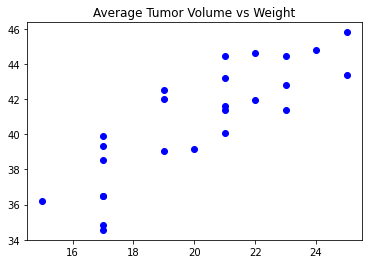

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

#Set x and y axis variables
average = capomulinAvg["Average Tumor Volume (mm3)"]
weight = capomulinAvg["Weight (g)"]

#Plot Graph
capomulinScatter = plt.scatter(weight, average, color = 'b',)
plt.title("Average Tumor Volume vs Weight")
plt.show()

## Correlation and Regression

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulinScatter

# Observations and Insights